In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from pprint import pprint
import matplotlib.pyplot as plt

# Reading Data

In [2]:
def segmentWords(s): 
    return s.split()

def readFile(fileName):
    # Function for reading file
    # input: filename as string
    # output: contents of file as list containing single words
    contents = []
    f = open(fileName)
    for line in f:
        contents.append(line)
    f.close()
    result = segmentWords('\n'.join(contents))
    return result

#### Create a Dataframe containing the counts of each word in a file

In [3]:
d = []

for c in os.listdir("data_training"):
    if c != ".DS_Store":
        directory = "data_training/" + c
        for file in os.listdir(directory):
            words = readFile(directory + "/" + file)
            e = {x:words.count(x) for x in words}
            e['__FileID__'] = file
            e['__CLASS__'] = c
            d.append(e)

Create a dataframe from d - make sure to fill all the nan values with zeros.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html


In [4]:
data = pd.DataFrame.from_records(d)
data = data.fillna(value = 0)

#### Split data into training and validation set 

* Sample 80% of your dataframe to be the training data

* Let the remaining 20% be the validation data (you can filter out the indicies of the original dataframe that weren't selected for the training data)

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [8]:
training_data = data.sample(frac = 0.8, random_state = 200)
validation_data = data.drop(training_data.index)
data.drop(data.columns[3], axis=1)
#data

,,earth,goodies,ripley,suspend,they,white,,,!,...,zukovsky,zundel,zurg's,zweibel,zwick,zwick's,zwigoff's,zycie,zycie',|
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Split the dataframe for both training and validation data into x and y dataframes - where y contains the labels and x contains the words

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [6]:
X_train = training_data.drop(['__CLASS__', '__FileID__'], axis=1)
y_train = training_data['__CLASS__']
X_valid = validation_data.drop(['__CLASS__', '__FileID__'], axis=1)
y_valid = validation_data['__CLASS__']

# Logistic Regression

#### Basic Logistic Regression
* Use sklearn's linear_model.LogisticRegression() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [77]:
logreg = LogisticRegression()
logmodel = logreg.fit(X_train, y_train)
print("Score for training data: {}".format(logmodel.score(X_train, y_train)))
print("Score for validation data: {}".format(logmodel.score(X_valid, y_valid)))

logreg_l1 = LogisticRegression(penalty="l1", C=5)
logmodel_l1 = logreg_l1.fit(X_train, y_train)
print("Score for training data: {}".format(logmodel_l1.score(X_train, y_train)))
print("Score for validation data: {}".format(logmodel_l1.score(X_valid, y_valid)))

Score for training data: 1.0
Score for validation data: 0.81875
Score for training data: 1.0
Score for validation data: 0.796875


#### Changing Parameters

In [78]:
coef_normed = normalize(logmodel.coef_)[0]
std = np.std(coef_normed)
mean = np.mean(coef_normed)

for i in range(len(coef_normed)):
    if coef_normed[i] <= mean + 1.5*std and coef_normed[i] >= mean - 1.5*std:
        logmodel.coef_[0][i] = 0
        
        
        
coef_normed = normalize(logmodel_l1.coef_)[0]
std = np.std(coef_normed)
mean = np.mean(coef_normed)

for i in range(len(coef_normed)):
    if coef_normed[i] <= mean + 1.5*std and coef_normed[i] >= mean - 1.5*std:
        logmodel_l1.coef_[0][i] = 0

#### Feature Selection
* In the backward stepsize selection method, you can remove coefficients and the corresponding x columns, where the coefficient is more than a particular amount away from the mean - you can choose how far from the mean is reasonable.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html# 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html

In [79]:
print("Score for training data: {}".format(logmodel.score(X_train, y_train)))
print("Score for validation data: {}".format(logmodel.score(X_valid, y_valid)))

print("Score for training data: {}".format(logmodel_l1.score(X_train, y_train)))
print("Score for validation data: {}".format(logmodel_l1.score(X_valid, y_valid)))

Score for training data: 0.99765625
Score for validation data: 0.825
Score for training data: 0.98671875
Score for validation data: 0.76875


How did you select which features to remove? Why did that reduce overfitting?

Answer:

**Remove features that are more than 1 standard deviation away from the mean of normalized coefficients. This reduces overfitting by removing outliers and features that are not as close to the decision boundary.**

# Single Decision Tree

#### Basic Decision Tree

* Initialize your model as a decision tree with sklearn.
* Fit the data and labels to the model.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [10]:
dtc = DecisionTreeClassifier()
dtcmodel = dtc.fit(X_train, y_train)
print("Score for training data: {}".format(dtcmodel.score(X_train, y_train)))
print("Score for validation data: {}".format(dtcmodel.score(X_valid, y_valid)))

Score for training data: 1.0
Score for validation data: 0.665625


#### Changing Parameters
* To test out which value is optimal for a particular parameter, you can either loop through various values or look into sklearn.model_selection.GridSearchCV

References:


http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [11]:
def mean(lst):
    size = len(lst)
    return sum(lst) / size

params = {"splitter":["best", "random"],
#           "max_depth":[None],
          "min_samples_split":[3,4,5,6],
          "min_samples_leaf":[2,3,4],
          "max_features":["auto", "sqrt", "log2", None],
#           "random_state":[None],
#           "max_leaf_nodes":[None],
#           "min_impurity_decrease":[0],
          "class_weight":["balanced", None],
          "presort":[True, False]}

results = {"splitter":None,
           "min_samples_split":None,
           "min_samples_leaf":None,
           "max_features":None,
           "class_weight":None,
           "presort":None}

split = params["splitter"]
mss = params["min_samples_split"]
msl = params["min_samples_leaf"]
mf = params["max_features"]
cw = params["class_weight"]
ps = params["presort"]

param_heads = ["splitter", "min_samples_split", "min_samples_leaf", "max_features", "class_weight", "presort"]
temp_results = []

for header in param_heads:
    temp_results = []
    for param_value in params[header]:
        dtc_temp = None
        if header == "splitter":
            dtc_temp = DecisionTreeClassifier(splitter=param_value)
        elif header == "min_samples_split":
            dtc_temp = DecisionTreeClassifier(min_samples_split=param_value)
        elif header == "min_samples_leaf":
            dtc_temp = DecisionTreeClassifier(min_samples_leaf=param_value)
        elif header == "max_features":
            dtc_temp = DecisionTreeClassifier(max_features=param_value)
        elif header == "class_weight":
            dtc_temp = DecisionTreeClassifier(class_weight=param_value)
        elif header == "presort":
            dtc_temp = DecisionTreeClassifier(presort=param_value)
        dtcmodel_temp = dtc_temp.fit(X_train, y_train)
        temp_results.append(dtcmodel_temp.score(X_valid, y_valid))
    results[header] = temp_results

pprint(results)

{'class_weight': [0.640625, 0.625],
 'max_features': [0.55625000000000002,
                  0.58750000000000002,
                  0.54062500000000002,
                  0.63437500000000002],
 'min_samples_leaf': [0.63749999999999996,
                      0.65312499999999996,
                      0.61875000000000002],
 'min_samples_split': [0.66249999999999998,
                       0.60624999999999996,
                       0.64687499999999998,
                       0.65312499999999996],
 'presort': [0.64375000000000004, 0.63749999999999996],
 'splitter': [0.640625, 0.60624999999999996]}


How did you choose which parameters to change and what value to give to them? Feel free to show a plot.

Answer:

**Select the features for each parameter that produce the highest score, and combine them together. **

In [48]:
final_params = {}
for header in param_heads:
    final_params[header] = params[header][np.argmax(results[header])]

dtc_final = DecisionTreeClassifier(**final_params)
dtcmodel_final = dtc_final.fit(X_train, y_train)
print("Score for training data: {}".format(dtcmodel_final.score(X_train, y_train)))
print("Score for validation data: {}".format(dtcmodel_final.score(X_valid, y_valid)))

Score for training data: 0.93046875
Score for validation data: 0.6375


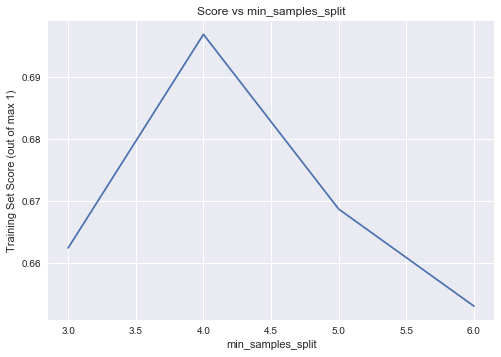

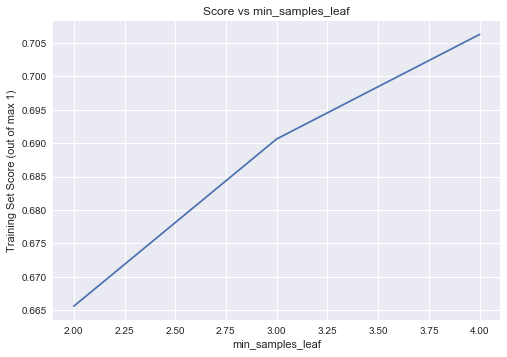

In [50]:
# plot for min_samples_split
x = [3,4,5,6]
y = results["min_samples_split"]
plt.xlabel("min_samples_split")
plt.ylabel("Training Set Score (out of max 1)")
plt.title("Score vs min_samples_split")
plt.plot(x, y)
plt.show()

# plot for min_samples_leaf
x = [2,3,4]
y = results["min_samples_leaf"]
plt.xlabel("min_samples_leaf")
plt.ylabel("Training Set Score (out of max 1)")
plt.title("Score vs min_samples_leaf")
plt.plot(x, y)
plt.show()

Why is a single decision tree so prone to overfitting?

Answer:

**Decision trees of infinite depth can effectively create a separate branch for every single data point that it is trained on, therefore the model itself inherently remembers exact data points and classifications. Therefore decision tree models are VERY prone to overfitting because it contains a branch that remembers the exact data point and classification of the data point that it is being scored on, and obviously can and will return the correct classification for that data point.**

# Random Forest Classifier

#### Basic Random Forest

* Use sklearn's ensemble.RandomForestClassifier() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [16]:
rfc = RandomForestClassifier(random_state = 0)
rfcmodel = rfc.fit(X_train, y_train)
print("Score for training data: {}".format(rfcmodel.score(X_train, y_train)))
print("Score for validation data: {}".format(rfcmodel.score(X_valid, y_valid)))

Score for training data: 0.9953125
Score for validation data: 0.6875


#### Changing Parameters

In [14]:
def mean(lst):
    size = len(lst)
    return sum(lst) / size

params = {#"splitter":["best", "random"],
#           "max_depth":[None],
          "min_samples_split":[3,4,5,6],
          "min_samples_leaf":[2,3,4],
          "max_features":["auto", "sqrt", "log2", None],
#           "random_state":[None],
#           "max_leaf_nodes":[None],
#           "min_impurity_decrease":[0],
          "class_weight":["balanced", None]}

results = {"min_samples_split":None,
           "min_samples_leaf":None,
           "max_features":None,
           "class_weight":None}

#split = params["splitter"]
mss = params["min_samples_split"]
msl = params["min_samples_leaf"]
mf = params["max_features"]
cw = params["class_weight"]
#ps = params["presort"]

param_heads = ["min_samples_split", "min_samples_leaf", "max_features", "class_weight"]#, "presort"]
temp_results = []

for header in param_heads:
    temp_results = []
    for param_value in params[header]:
        rfc_temp = None
        #if header == "splitter":
            #dtc_temp = RandomForestClassifier(splitter=param_value)
        if header == "min_samples_split":
            rfc_temp = RandomForestClassifier(min_samples_split=param_value)
        elif header == "min_samples_leaf":
            rfc_temp = RandomForestClassifier(min_samples_leaf=param_value)
        elif header == "max_features":
            rfc_temp = RandomForestClassifier(max_features=param_value)
        elif header == "class_weight":
            rfc_temp = RandomForestClassifier(class_weight=param_value)
        #elif header == "presort":
            #dtc_temp = RandomForestClassifier(presort=param_value)
        rfcmodel_temp = rfc_temp.fit(X_train, y_train)
        temp_results.append(rfcmodel_temp.score(X_valid, y_valid))
    results[header] = temp_results

pprint(results)

{'class_weight': [0.63124999999999998, 0.67812499999999998],
 'max_features': [0.59375,
                  0.64375000000000004,
                  0.62187499999999996,
                  0.69999999999999996],
 'min_samples_leaf': [0.66562500000000002,
                      0.69062500000000004,
                      0.70625000000000004],
 'min_samples_split': [0.66249999999999998,
                       0.69687500000000002,
                       0.66874999999999996,
                       0.65312499999999996]}


What parameters did you choose to change and why?

Answer :
    
**Select the features for each parameter that produce the highest score, and combine them together.**

In [15]:
final_params = {}
for header in param_heads:
    final_params[header] = params[header][np.argmax(results[header])]

rfc_final = RandomForestClassifier(**final_params)
rfcmodel_final = rfc_final.fit(X_train, y_train)
print("Score for training data: {}".format(rfcmodel_final.score(X_train, y_train)))
print("Score for validation data: {}".format(rfcmodel_final.score(X_valid, y_valid)))

Score for training data: 0.965625
Score for validation data: 0.71875


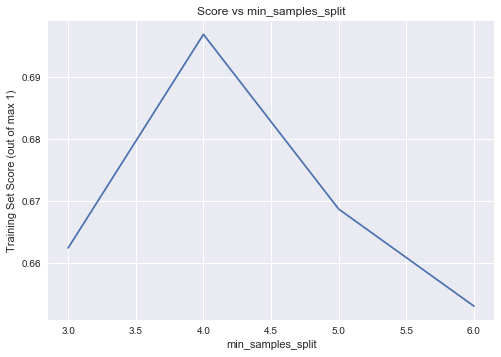

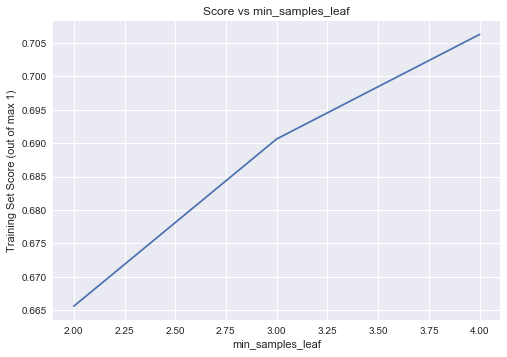

In [51]:
# plot for min_samples_split
x = [3,4,5,6]
y = results["min_samples_split"]
plt.xlabel("min_samples_split")
plt.ylabel("Training Set Score (out of max 1)")
plt.title("Score vs min_samples_split")
plt.plot(x, y)
plt.show()

# plot for min_samples_leaf
x = [2,3,4]
y = results["min_samples_leaf"]
plt.xlabel("min_samples_leaf")
plt.ylabel("Training Set Score (out of max 1)")
plt.title("Score vs min_samples_leaf")
plt.plot(x, y)
plt.show()

How does a random forest classifier prevent overfitting better than a single decision tree?

**Random forests avoid the overfitting problem by training their individual decision trees on different parts of the training set and aggregating their results for the final classification. This is effective in preventing overfitting because, even if we were to allow infinitely deep trees and pass in a training data point to be classified by the forest, only a single tree in that forest will overfit since only a single tree was trained on that data point. This means that in a forest with say 10 trees, one tree will overfit and give a poor decision, while the remaining 9 trees give proper classifications. Since forests make decisions by some aggregation method, commonly voting, outlier results caused by overfitting are completely negated by forests. While this example only proves how forests will avoid overfitting on a training set, it extends further to a forest’s improved ability to classify validation sets, since by avoiding obtusely over-trained trees which learn strange behaviors, the forest is able to maintain low variance and more accurately classify data in general.**